In [36]:
import pandas as pd

# Load the datasets
emissions_df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
per_capita_df = pd.read_csv('GCB2022v27_percapita_flat.csv')


In [37]:
# Display the first few rows
print(emissions_df.head())


       Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN  


In [38]:
print(per_capita_df.head())

       Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    NaN   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    NaN   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    NaN   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    NaN   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    NaN   NaN  NaN  NaN     NaN   

   Flaring  Other  
0      NaN    NaN  
1      NaN    NaN  
2      NaN    NaN  
3      NaN    NaN  
4      NaN    NaN  


In [39]:
# Dropping rows with missing values
emissions_df.dropna(inplace=True)
per_capita_df.dropna(inplace=True)

In [40]:
# Convert 'Year' to numeric
emissions_df['Year'] = pd.to_numeric(emissions_df['Year'])
per_capita_df['Year'] = pd.to_numeric(per_capita_df['Year'])

In [41]:
# Aggregating data
agg_df = emissions_df.groupby(['Country','Year']).sum().reset_index()

# Calculating percentages of emissions from each source
agg_df['Coal_pct'] = agg_df['Coal']/agg_df['Total']*100
agg_df['Oil_pct'] = agg_df['Oil']/agg_df['Total']*100
agg_df['Gas_pct'] = agg_df['Gas']/agg_df['Total']*100
agg_df['Cement_pct'] = agg_df['Cement']/agg_df['Total']*100


In [42]:
print(agg_df['Coal_pct'])

0       51.007621
1       52.260444
2       52.737439
3       51.960500
4       51.541715
          ...    
1614    10.101218
1615     8.764193
1616     6.720352
1617     6.991106
1618     6.831476
Name: Coal_pct, Length: 1619, dtype: float64


In [43]:
print(agg_df['Oil_pct'])

0       31.939875
1       31.569435
2       30.899472
3       31.289649
4       31.299001
          ...    
1614    45.138215
1615    45.581658
1616    46.331459
1617    44.130298
1618    44.441387
Name: Oil_pct, Length: 1619, dtype: float64


In [44]:
print(agg_df['Gas_pct'])

0       12.386950
1       11.729123
2       11.939348
3       12.348093
4       12.608934
          ...    
1614    41.742664
1615    42.526365
1616    43.679067
1617    45.797410
1618    45.812084
Name: Gas_pct, Length: 1619, dtype: float64


In [45]:
print(agg_df['Cement_pct'])

0       1.244947
1       1.138715
2       1.027469
3       1.040154
4       1.186352
          ...   
1614    1.138401
1615    1.149225
1616    1.219591
1617    1.195258
1618    1.124564
Name: Cement_pct, Length: 1619, dtype: float64


In [46]:
# Trends in total emissions over the years
trends_df = agg_df.groupby('Year')['Total'].sum().reset_index()

print(trends_df)


     Year         Total
0    1904    882.057539
1    1905    986.482442
2    1906   1035.471247
3    1907   1203.861422
4    1908   1052.812895
..    ...           ...
113  2017  61249.812593
114  2018  62429.532854
115  2019  62651.759362
116  2020  59860.223990
117  2021  62985.063806

[118 rows x 2 columns]


In [47]:
# To see the top 10 emitters
top_emitters = agg_df.groupby('Country')['Total'].sum().nlargest(10).reset_index()

print(top_emitters)

          Country          Total
0          Global  951517.271726
1             USA  408861.973286
2           China  244649.987304
3          Russia   53566.614169
4           Japan   39055.308550
5         Germany   27550.903693
6          Canada   17407.228484
7  United Kingdom   16406.061286
8     South Korea   16059.181452
9           Italy   13631.578127


In [48]:
# Per capita trend analsis
per_capita_trends = per_capita_df.groupby('Year')['Total'].mean().reset_index()

print(per_capita_trends)

     Year      Total
0    1904  10.693551
1    1905  11.723323
2    1906  12.072651
3    1907  13.783778
4    1908  11.822053
..    ...        ...
113  2017   7.971977
114  2018   7.910390
115  2019   7.573248
116  2020   6.942011
117  2021   7.161781

[118 rows x 2 columns]


In [49]:
import matplotlib.pyplot as plt
import seaborn as sb

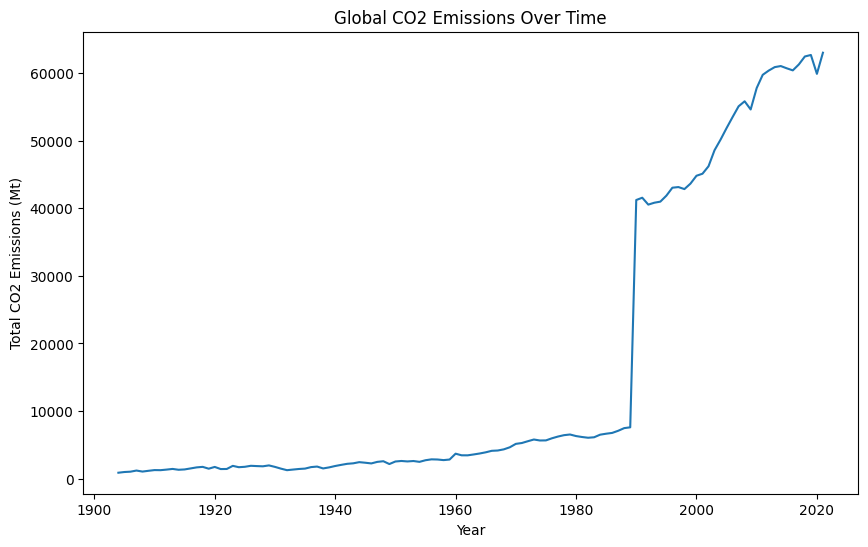

In [50]:
# Plotting the trends in total emissions over the years
# Line charts are preferably good for showing trends over time
plt.figure(figsize=(10, 6))
sb.lineplot(x='Year', y='Total', data=trends_df)
plt.title('Global CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Mt)')
plt.show()

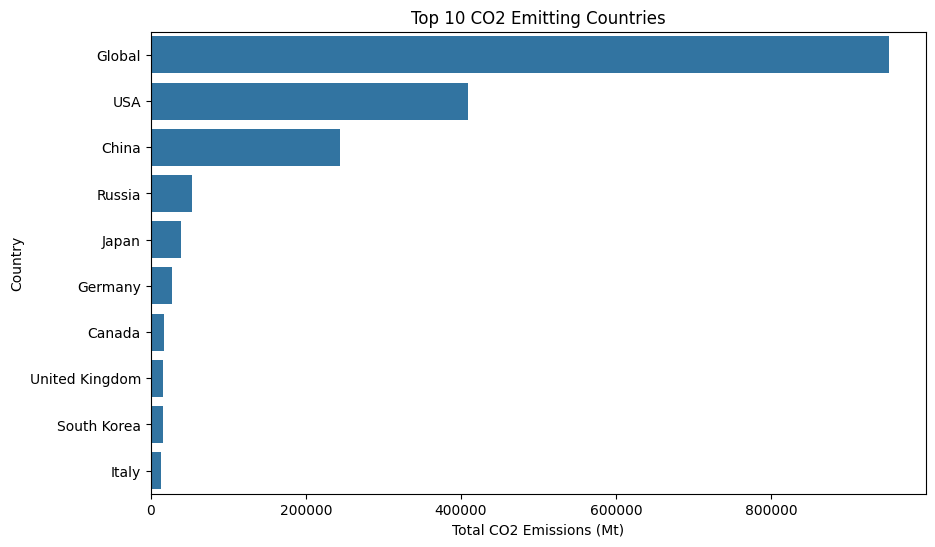

In [51]:
# plotting the top 10 emitters
# Bar charts are my go-to for showing comparision
plt.figure(figsize=(10, 6))
sb.barplot(x='Total', y='Country', data=top_emitters)
plt.title('Top 10 CO2 Emitting Countries')
plt.xlabel('Total CO2 Emissions (Mt)')
plt.ylabel('Country')
plt.show()

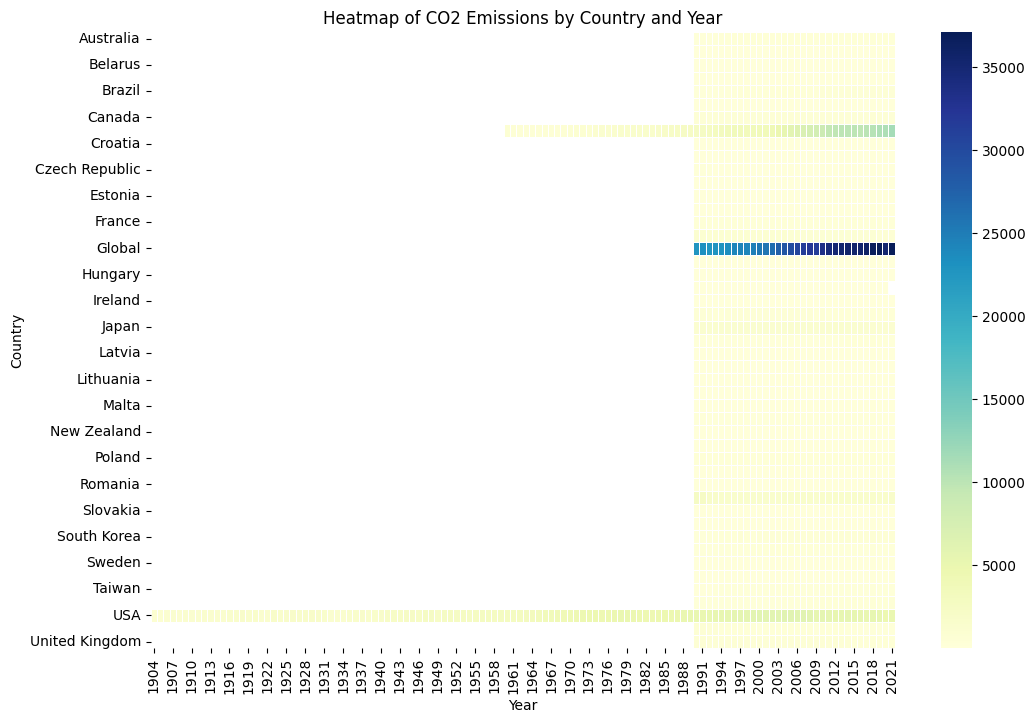

In [52]:
# plotting a heatmap to show the correlation between countries
# Heatmaps are good for showing disribution of data

heatmap_data = agg_df.pivot(index='Country', columns='Year', values='Total')
plt.figure(figsize=(12, 8))
sb.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of CO2 Emissions by Country and Year')
plt.show()